# Imbalanced Sample

In [34]:
# Load data manipulation package
import numpy as np
import pandas as pd

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Load Data**
---

The [dataset](https://data.mendeley.com/datasets/x8ygrw87jw/1) comes from a study to predict a cerebrovascular stroke accident (CVA) or `stroke`, a binary response variable.
- `stroke`
  - `stroke = 0` for CVA didn't happen.
  - `stroke = 1` for CVA happened.

The potential predictors for the response variable are:
1. `gender`
2. `age`
3. `hypertension`
4. `heart_disease`
5. `ever_married`
6. `work_type`
7. `Residence_type`
8. `avg_glucose_level`
9. `bmi`
10. `smoking_status`

In [35]:
# Import dataset from csv file
data = pd.read_csv('../data/stroke.csv')

# Table check
data.head().T

,0,1,2,3,4
id,30669,30468,16523,56543,46136
gender,Male,Male,Female,Female,Male
age,3.0,58.0,8.0,70.0,14.0
hypertension,0,1,0,0,0
heart_disease,0,0,0,0,0
ever_married,No,Yes,No,Yes,No
work_type,children,Private,Private,Private,Never_worked
Residence_type,Rural,Urban,Urban,Rural,Rural
avg_glucose_level,95.12,87.96,110.89,69.04,161.28
bmi,18.0,39.2,17.6,35.9,19.1


In [36]:
# Check the data shape
data.shape

(43400, 12)

  - Our sample contains 12 variables from 43,400 observations.
    - 1 response variable, `stroke`,
    - 1 column `ID`,
    - and 10 potential predictors.

Check for the duplicate respondents in our sample using column `id`.

In [37]:
# Find the sum/total of duplicated respondents' IDs.
data['id'].duplicated().sum()

0

In [38]:
# Drop column ID
data = data.drop(columns=['id'], axis=1)

# Information check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     30108 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


Check the proportion of response variable first to decide the splitting strategy.

In [39]:
# Define response variable
response_variable = 'stroke'

# Check the proportion of response variable
data[response_variable].value_counts(normalize=True)

stroke
0    0.981959
1    0.018041
Name: proportion, dtype: float64

The proportion of the response variable, `stroke`, is highly imbalanced (in a ratio of 98:2).

After EDA, we will preprocess the sample into:
1. The original training set
2. Training set with undersampling
3. Training set with oversampling

## **2. Sample Splitting**
---

First, define the predictors (X) and the response (y).

In [40]:
# Split response and predictors
y = data[response_variable]
X = data.drop(columns=[response_variable], axis=1)

# Validate the splitting
print('y shape :', y.shape)
print('X shape :', X.shape)

y shape : (43400,)
X shape : (43400, 10)


Next, split the training and testing set from each predictors (X) and response (y).
- Set `stratify = y` for splitting the sample with stratify, based on the proportion of response y.
- Set `test_size = 0.3` for holding 30% of the sample as a testing set.
- Set `random_state = 42` for reproducibility.

In [41]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 42)

# Validate splitting
print('X train shape :', X_train.shape)
print('y train shape :', y_train.shape)
print('X test shape  :', X_test.shape)
print('y test shape  :', y_test.shape)

X train shape : (30380, 10)
y train shape : (30380,)
X test shape  : (13020, 10)
y test shape  : (13020,)


Check the proportion of response y in each training and testing set.

In [42]:
y_train.value_counts(normalize=True)

stroke
0    0.981962
1    0.018038
Name: proportion, dtype: float64

In [43]:
y_test.value_counts(normalize=True)

stroke
0    0.981951
1    0.018049
Name: proportion, dtype: float64

## **3. Exploratory Data Analysis**
---

- To make a model that predicts well on unseen data, we must prevent leakage of test set information.
- Thus, we only explore on **training set**.

In [44]:
# Concatenate X_train and y_train as data_train
data_train = pd.concat((X_train, y_train), axis=1)

# Validate data_train
print('Train data shape:', data_train.shape)
data_train.head().T

Train data shape: (30380, 11)


,5473,26630,17083,4730,19154
gender,Male,Female,Male,Male,Female
age,7.0,53.0,26.0,7.0,44.0
hypertension,0,0,0,0,0
heart_disease,0,1,0,0,0
ever_married,No,No,No,No,Yes
work_type,children,Private,Private,children,Private
Residence_type,Rural,Urban,Rural,Urban,Urban
avg_glucose_level,102.78,94.68,88.28,77.12,84.55
bmi,18.1,NaN,36.3,18.6,44.5
smoking_status,NaN,never smoked,never smoked,NaN,NaN


What do we do in EDA?
- Check for any insight in the data:
  - Distribution or proportion
  - Outliers
  - Sparse data
  - Perfect discrimination
- Make a plan for data pre-processing.

In [45]:
# Check for missing values
data_train.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   995
smoking_status       9332
stroke                  0
dtype: int64

In [46]:
# Check for data type
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30380 entries, 5473 to 21868
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             30380 non-null  object 
 1   age                30380 non-null  float64
 2   hypertension       30380 non-null  int64  
 3   heart_disease      30380 non-null  int64  
 4   ever_married       30380 non-null  object 
 5   work_type          30380 non-null  object 
 6   Residence_type     30380 non-null  object 
 7   avg_glucose_level  30380 non-null  float64
 8   bmi                29385 non-null  float64
 9   smoking_status     21048 non-null  object 
 10  stroke             30380 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 2.8+ MB


**Summary**
- There are big number of missing values in `smoking_status` and small number of missing value in `bmi`.
  - `smoking_status` is categorical variable.
  - `bmi` is float variable.
- We need to find how to handle the missing values by exploring those variables.

### Predictor 1: gender

---
Gender of the respondent: male or female.

In [47]:
# Describe proportion of 'gender'
data_train['gender'].value_counts(normalize = True)

gender
Female    0.590520
Male      0.409151
Other     0.000329
Name: proportion, dtype: float64

From here, we know:
- We have gender of 'Other' in our sample.
  - Since we can't explain the dataset well, we will drop about 0.02% sample with gender of 'Other'
- Gender (female and male) of our sample is quite balanced, in a ratio of 59:41.

In [48]:
# Remove gender 'Other' from sample
data_train.drop(data_train[(data_train['gender'] == 'Other')].index,
                inplace = True)

<Axes: xlabel='gender', ylabel='count'>

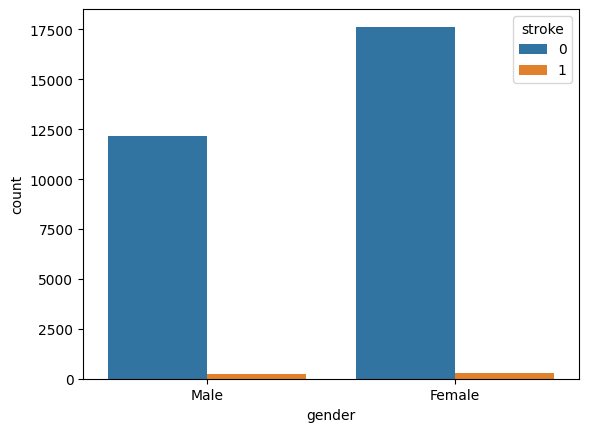

In [49]:
# Describe proportion of stroke by gender
sns.countplot(data = data_train,
              x = 'gender',
              hue = response_variable)

In [50]:
def calculate_odds(data, predictor_label):
  # Frequency of default by predictor_label
  crosstab = pd.crosstab(data[predictor_label],
                         data[response_variable],
                         margins = False)

  # Calculate odds
  crosstab['Odds'] = np.round((crosstab[1]/crosstab[0]),3)

  # Sort by the odds value
  crosstab = crosstab.sort_values(by = 'Odds',
                       ascending = False)

  return crosstab

In [51]:
# Calculate odds of default from predictor 'person_home_ownership'
odds_gender = calculate_odds(data = data_train,
                             predictor_label = 'gender')

odds_gender

stroke,0,1,Odds
gender,,,
Male,12184,246,0.020
Female,17638,302,0.017


Create a function to perform test of independence.

In [52]:
# Import the package
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Create a function of independence test
def independence_test(data, predictor_label, alpha=0.05):
    """
    Function to perform the independence test.

    Parameters
    ----------
    data : array like
      The data label.

    predictor_label : object
      The label of predictor variable.

    alpha : float in range[0,1], default = 0.05
      Probability of Type I Error (reject H0 when H0 is true).

    """
    # Build the contingency table
    crosstab = pd.crosstab(data[predictor_label],
                           data[response_variable],
                           margins = False)

    # Test whether churn is independent of the predictor
    stats.chi2_contingency(crosstab)

    # Result of independence test
    result = stats.chi2_contingency(crosstab)

    # Extract the test result
    stat = result[0]
    pval = result[1]

    # Print the conclusion
    if pval < alpha:
        print(f"Stroke and {predictor_label} is not independent with P-val={pval:.2f}.")
    else:
        print(f"Stroke and {predictor_label} is independent with P-val={pval:.2f}.")

In [53]:
# Perform the independence test
independence_test(data = data_train,
                  predictor_label = 'gender',
                  alpha = 0.05)

Stroke and gender is independent with P-val=0.06.


**Summary**
- Gender of 'Other' is removed from the sample.
- The probability of stroke and gender is not independent.

**Pre-processing Plan:**
- We don't have empty cells and missing values from `gender` variable.

### Predictor 2: age
---
Age of the respondent.

In [54]:
# Descriptive statistics of age
data_train['age'].describe()

count    30370.000000
mean        42.298049
std         22.531448
min          0.080000
25%         24.000000
50%         44.000000
75%         60.000000
max         82.000000
Name: age, dtype: float64

- We have newborn respondents.
- Half of our respondents are older than 44, with a maximum age of 82.

<Axes: xlabel='age', ylabel='Count'>

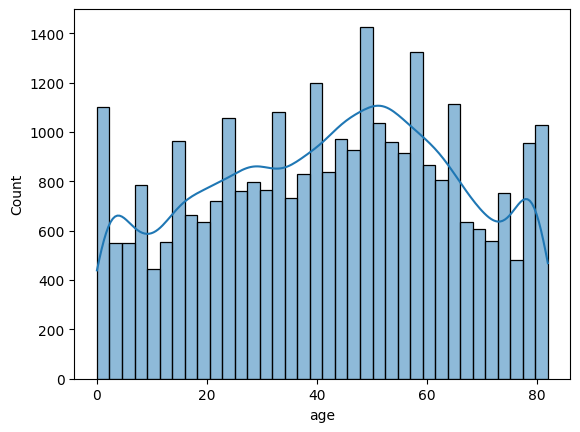

In [55]:
# Distribution plot of age
sns.histplot(data = data_train,
             x = 'age',
             kde = True)

In [56]:
# Descriptive of age by response stroke
data_train['age'].groupby(data_train[response_variable]).describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,29822.0,41.823478,22.401619,0.08,24.0,43.0,59.0,82.0
1,548.0,68.124088,12.089063,14.00,60.0,71.0,79.0,82.0


<Axes: xlabel='stroke', ylabel='age'>

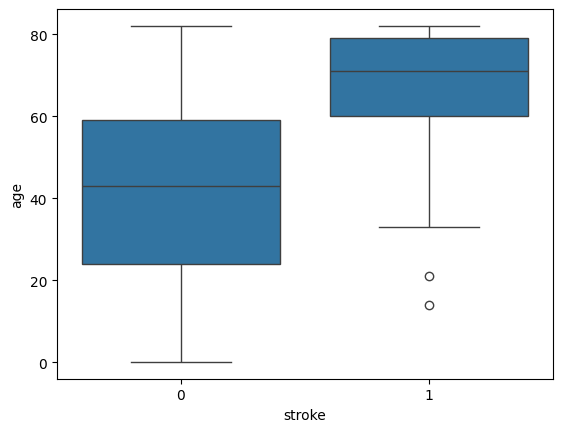

In [57]:
# Boxplot of age by response stroke
sns.boxplot(data = data_train,
            x = response_variable,
            y = 'age')

- Respondents that have a stroke are older than 71, but
- There are one-year-old babies who has a stroke.

<Axes: xlabel='age', ylabel='stroke'>

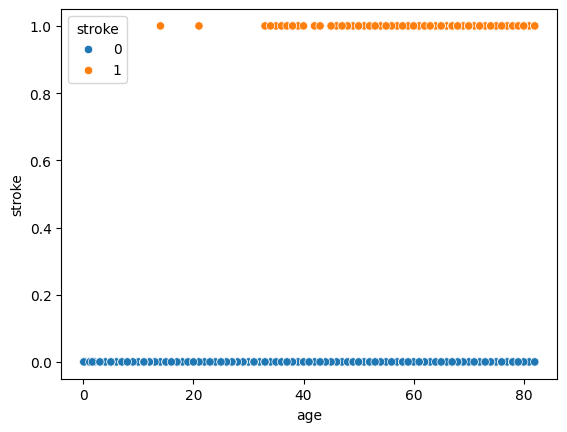

In [58]:
# Check for the perfect separation
sns.scatterplot(data = data_train,
                x = 'age',
                y = response_variable,
                hue = 'stroke')

**Summary**

- We have newborn respondents.
- The youngest respondents who have a stroke are one year old babies.

**Pre-processing Plan:**
- Since we have high proportion of babies and toddlers in our sample, we don't assume that group of childrens as outliers.
- We don't have missing values and perfect separation from `age` variable.

### Predictor 3: hypertension

---
Whether a respondent has a history of:
- `1` : hypertension
- `0` : normal blood pressure

In [59]:
# Describe proportion of 'hypertension'
data_train['hypertension'].value_counts(normalize = True)

hypertension
0    0.907079
1    0.092921
Name: proportion, dtype: float64

From here, we know:
- Only about 9% of sample has a history of hypertension.

<Axes: xlabel='hypertension', ylabel='count'>

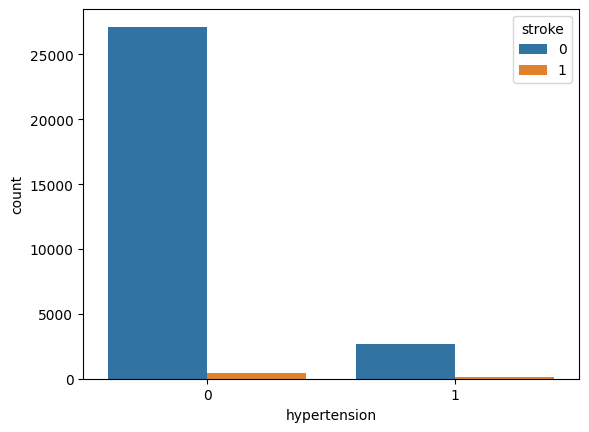

In [60]:
# Describe proportion of stroke by `hypertension`
sns.countplot(data = data_train,
              x = 'hypertension',
              hue = response_variable)

In [61]:
# Calculate odds of default from predictor 'hypertension'
odds_hypertension = calculate_odds(data = data_train,
                                   predictor_label = 'hypertension')

odds_hypertension

stroke,0,1,Odds
hypertension,,,
1,2687,135,0.050
0,27135,413,0.015


In [62]:
# Perform the independence test
independence_test(data = data_train,
                  predictor_label = 'hypertension',
                  alpha = 0.05)

Stroke and hypertension is not independent with P-val=0.00.


**Summary**
- The probability of stroke and history of hipertension is not independent.

**Pre-processing Plan:**
- We don't have empty cells and missing values from `hypertension` variable.

### Predictor 4: heart_disease

---
Whether a respondent is diagnosed with:
- `1` : heart disease
- `0` : no heart disease

In [63]:
# Describe proportion of 'heart_disease'
data_train['heart_disease'].value_counts(normalize = True)

heart_disease
0    0.951795
1    0.048205
Name: proportion, dtype: float64

From here, we know:
- Only about 5% of sample is diagnosed with heart disease.

<Axes: xlabel='heart_disease', ylabel='count'>

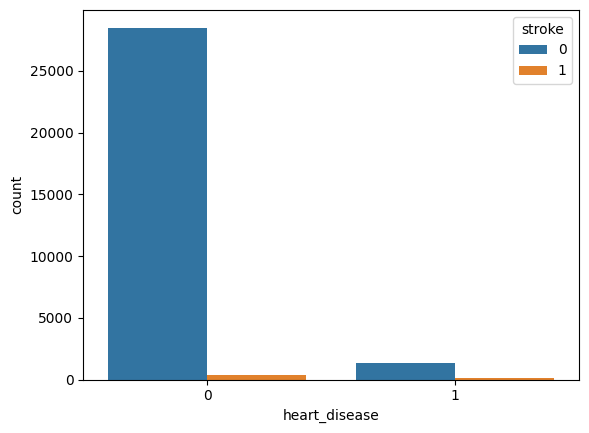

In [64]:
# Describe proportion of stroke by `heart_disease`
sns.countplot(data = data_train,
              x = 'heart_disease',
              hue = response_variable)

In [65]:
# Calculate odds of default from predictor 'heart_disease'
odds_heart_disease = calculate_odds(data = data_train,
                                    predictor_label = 'heart_disease')

odds_heart_disease

stroke,0,1,Odds
heart_disease,,,
1,1323,141,0.107
0,28499,407,0.014


In [66]:
# Perform the independence test
independence_test(data = data_train,
                  predictor_label = 'heart_disease',
                  alpha = 0.05)

Stroke and heart_disease is not independent with P-val=0.00.


**Summary**
- The probability of stroke and heart disease is not independent.

**Pre-processing Plan:**
- We don't have empty cells and missing values from `heart_disease` variable.

### Predictor 5: ever_married
---
Whether a respondent has:
- `1` : ever married
- `0` : never married

In [67]:
# Describe proportion of 'ever_married'
data_train['ever_married'].value_counts(normalize = True)

ever_married
Yes    0.645308
No     0.354692
Name: proportion, dtype: float64

From here, we know:
- Our sample is dominated by respondents who have ever married, in a ratio of 65:35.

<Axes: xlabel='ever_married', ylabel='count'>

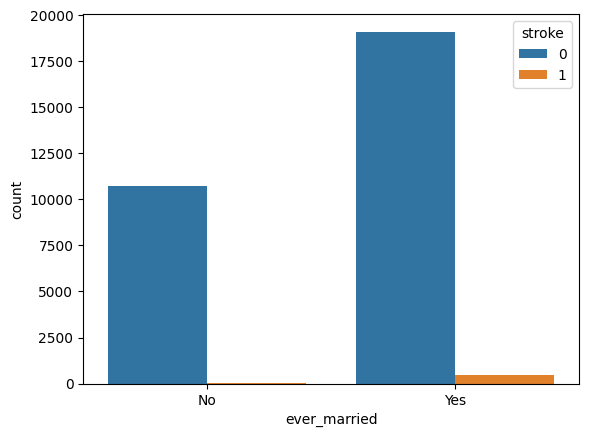

In [68]:
# Describe proportion of stroke by `ever_married`
sns.countplot(data = data_train,
              x = 'ever_married',
              hue = response_variable)

In [69]:
# Calculate odds of default from predictor 'ever_married'
odds_ever_married = calculate_odds(data = data_train,
                                   predictor_label = 'ever_married')

odds_ever_married

stroke,0,1,Odds
ever_married,,,
Yes,19108,490,0.026
No,10714,58,0.005


In [70]:
# Perform the independence test
independence_test(data = data_train,
                  predictor_label = 'ever_married',
                  alpha = 0.05)

Stroke and ever_married is not independent with P-val=0.00.


**Summary**
- The probability of stroke and marital status is not independent.

**Pre-processing Plan:**
- We don't have empty cells and missing values from `ever_married` variable.

### Predictor 6: work_type
---
Type of the respondent's job.

In [71]:
# Describe proportion of 'work_type'
data_train['work_type'].value_counts(normalize = True)

work_type
Private          0.572078
Self-employed    0.157260
children         0.141225
Govt_job         0.125255
Never_worked     0.004182
Name: proportion, dtype: float64

From here, we know:
- We have 5 categories of work type, one of which is the children category.
- Our sample is dominated by respondents with private jobs and a small proportion of respondents who never worked.
- First, check whether the respondents who never worked are children.

In [72]:
# Descriptive of age by work_type
data_train['age'].groupby(data_train['work_type']).describe()

,count,mean,std,min,25%,50%,75%,max
work_type,,,,,,,,
Govt_job,3804.0,48.987645,15.334010,13.00,38.0,49.0,60.0,82.0
Never_worked,127.0,18.070866,7.417462,13.00,15.0,16.0,18.0,64.0
Private,17374.0,45.089559,18.371332,13.00,29.0,44.0,59.0,82.0
Self-employed,4776.0,59.416876,16.835384,13.00,48.0,62.0,74.0,82.0
children,4289.0,6.711765,4.530109,0.08,2.0,6.0,11.0,16.0


- Three-quarters of respondents who never worked are children between 13-18.
- Let's check the proportion of respondents who never worked and older than 18.

In [73]:
# Check the proportion of respondents who never worked and older than 18
condition_1 = data_train['work_type'] == 'Never_worked'
condition_2 = data_train['age'] > 18
data_train.loc[condition_1 & condition_2]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
15057,Male,19.0,0,0,No,Never_worked,Rural,126.97,25.1,never smoked,0
14708,Female,21.0,0,0,No,Never_worked,Rural,78.47,20.4,never smoked,0
362,Male,23.0,0,0,No,Never_worked,Urban,125.26,18.7,never smoked,0
38558,Female,29.0,0,0,No,Never_worked,Rural,91.12,33.8,NaN,0
36331,Female,20.0,0,0,No,Never_worked,Urban,79.95,30.9,never smoked,0
22220,Male,19.0,0,0,No,Never_worked,Rural,76.71,22.1,never smoked,0
39001,Male,22.0,0,0,No,Never_worked,Urban,151.01,25.0,NaN,0
10096,Male,59.0,0,0,Yes,Never_worked,Urban,185.82,37.8,formerly smoked,0
19323,Female,23.0,0,0,No,Never_worked,Urban,66.89,26.8,never smoked,0
15458,Male,31.0,0,0,Yes,Never_worked,Rural,177.22,23.8,never smoked,0


We can't assume all of the respondents who never worked are children and elderly.

<Axes: xlabel='work_type', ylabel='count'>

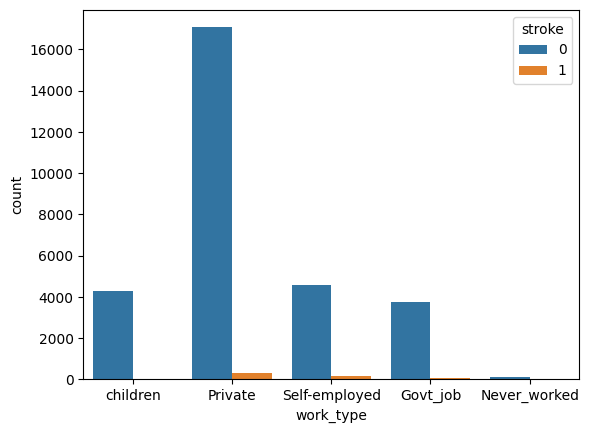

In [74]:
# Describe proportion of stroke by `work_type`
sns.countplot(data = data_train,
              x = 'work_type',
              hue = response_variable)

It seems we have sampling zeros. Let's check the contingency table.

In [75]:
# Calculate odds of default from predictor 'work_type'
odds_work_type = calculate_odds(data = data_train,
                                predictor_label = 'work_type')

odds_work_type

stroke,0,1,Odds
work_type,,,
Self-employed,4600,176,0.038
Govt_job,3738,66,0.018
Private,17069,305,0.018
Never_worked,127,0,0.000
children,4288,1,0.000


We have one empty cell for the stroke response from the respondents who never worked.

In [76]:
# Perform the independence test
independence_test(data = data_train,
                  predictor_label = 'work_type',
                  alpha = 0.05)

Stroke and work_type is not independent with P-val=0.00.


**Summary**
- We have 5 categories of work type, one of which is the children category.
- Our sample is dominated by respondents with private jobs and a small proportion of respondents who never worked.
- The probability of stroke and work type is not independent.

**Pre-processing Plan:**
- We don't have missing values from `ever_married` variable.
- We have one empty cell for the stroke response from the respondents who never worked. We will perform some remedies:
  - Add the empty cell by `1e-7`
  - Add the empty cell by `0.5`
  - Collapse the `children` category into `Never_worked` category.
- We won't remove the category of `Never_worked` since 75% of the repondents who never worked are children between 13-18.

### Predictor 7: Residence_type

---
Whether a respondent lives in an urban or rural area.

In [77]:
# Describe proportion of 'Residence_type'
data_train['Residence_type'].value_counts(normalize = True)

Residence_type
Urban    0.502535
Rural    0.497465
Name: proportion, dtype: float64

Proportion of respondents who live in urban or rural area is balanced, in a ratio of 50:50.

<Axes: xlabel='Residence_type', ylabel='count'>

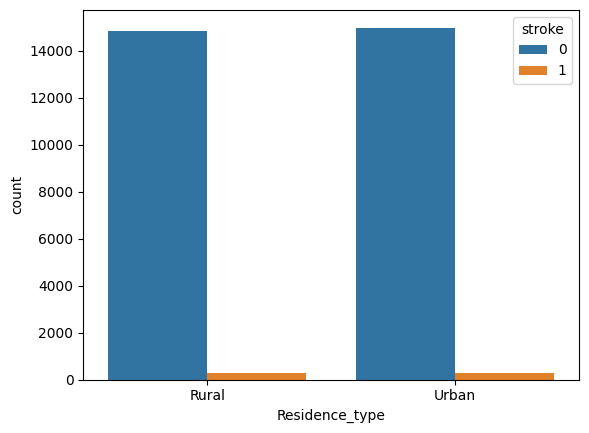

In [78]:
# Describe proportion of stroke by `Residence_type`
sns.countplot(data = data_train,
              x = 'Residence_type',
              hue = response_variable)

In [79]:
# Calculate odds of default from predictor 'Residence_type'
odds_residence = calculate_odds(data = data_train,
                                predictor_label = 'Residence_type')

odds_residence

stroke,0,1,Odds
Residence_type,,,
Rural,14834,274,0.018
Urban,14988,274,0.018


In [80]:
# Perform the independence test
independence_test(data = data_train,
                  predictor_label = 'Residence_type',
                  alpha = 0.05)

Stroke and Residence_type is independent with P-val=0.94.


**Summary**
- The probability of stroke and residence type is independent.

**Pre-processing Plan:**
- We don't have empty cells and missing values from `Residence_type` variable.

### Predictor 8: avg_glucose_level
---
The respondents' average fasting blood sugar level in last month.

In [81]:
# Descriptive statistics of avg_glucose_level
data_train['avg_glucose_level'].describe()

count    30370.000000
mean       104.235012
std         42.818697
min         55.000000
25%         77.530000
50%         91.510000
75%        111.767500
max        291.050000
Name: avg_glucose_level, dtype: float64

- At least half of our respondents are considered with normal fasting blood sugar level that under 100mg/dL, but
- A quarter of respondents have the average glucose level that higher than 112mg/dL and reach until 291mg/dL.

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

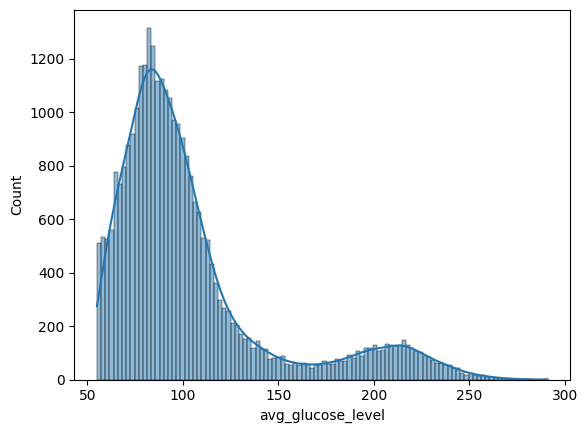

In [82]:
# Distribution plot of avg_glucose_level
sns.histplot(data = data_train,
             x = 'avg_glucose_level',
             kde = True)

It seems that we have two populations with the normal glucose level (< 100mg/dL) and the high glucose level (> 200mg/dL)

In [83]:
# Descriptive of avg_glucose_level by response stroke
data_train['avg_glucose_level'].groupby(data_train[response_variable]).describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,29822.0,103.725620,42.269836,55.00,77.4800,91.34,111.1900,291.05
1,548.0,131.955949,59.990416,55.01,81.6625,105.90,193.9825,271.74


<Axes: xlabel='stroke', ylabel='avg_glucose_level'>

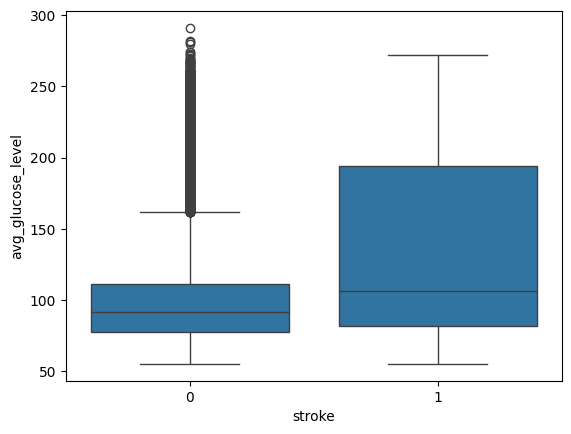

In [84]:
# Boxplot of avg_glucose_level by response stroke
sns.boxplot(data = data_train,
            x = response_variable,
            y = 'avg_glucose_level')

<Axes: xlabel='avg_glucose_level', ylabel='stroke'>

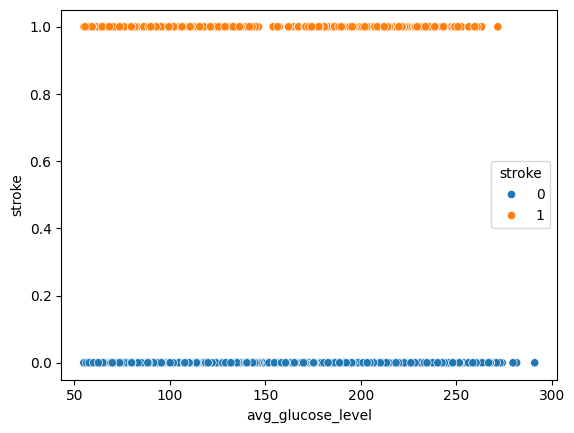

In [85]:
# Check for the perfect separation
sns.scatterplot(data = data_train,
                x = 'avg_glucose_level',
                y = response_variable,
                hue = 'stroke')

### Predictor 9: bmi
---
The respondents' Body Mass Index (BMI).

In [86]:
# Descriptive statistics of bmi
data_train['bmi'].describe()# Descriptive statistics of bmi
data_train['bmi'].describe()

count    29379.000000
mean        28.606508
std          7.740827
min         10.500000
25%         23.300000
50%         27.700000
75%         32.800000
max         97.600000
Name: bmi, dtype: float64

- The lowest level of respondents' BMI is 10.10 and
- The highest level can reach 97.6.
- Those min and max level of BMI are extreme conditions.

<Axes: xlabel='bmi', ylabel='Count'>

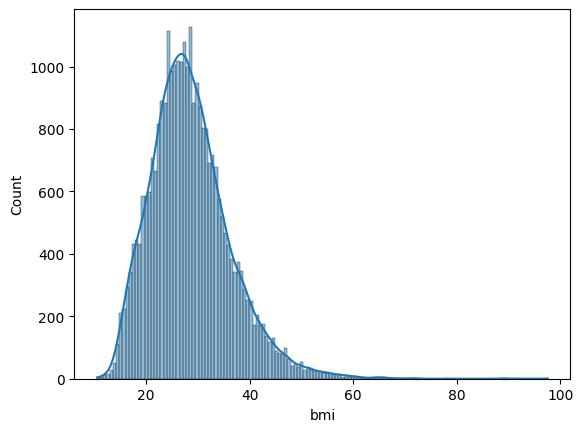

In [87]:
# Distribution plot of bmi
sns.histplot(data = data_train,
             x = 'bmi',
             kde = True)

In [88]:
# Descriptive of bmi by response stroke
data_train['bmi'].groupby(data_train[response_variable]).describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,28927.0,28.589802,7.764246,10.5,23.2,27.70,32.8,97.6
1,452.0,29.675664,5.966658,15.6,25.8,28.95,32.5,50.9


<Axes: xlabel='stroke', ylabel='bmi'>

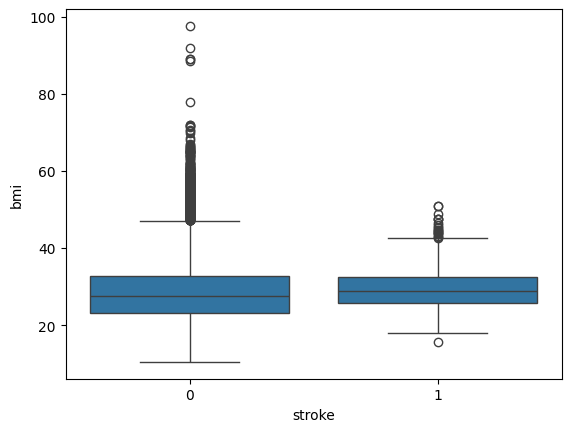

In [89]:
# Boxplot of bmi by response stroke
sns.boxplot(data = data_train,
            x = response_variable,
            y = 'bmi')

<Axes: xlabel='bmi', ylabel='stroke'>

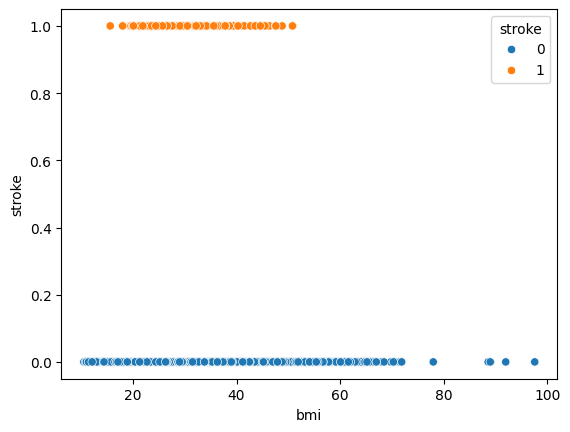

In [90]:
# Check for the perfect separation
sns.scatterplot(data = data_train,
                x = 'bmi',
                y = response_variable,
                hue = 'stroke')

**Summary**
- Our respondents' BMI level in average of 27-28, but
- Our sample contains extremely low and high level of BMI, in range between 10.10 until 97.6.

**Pre-processing Plan:**
- We don't have perfect separation from `bmi` variable, but
- We have missing values, thus
  - We will impute the missing values by the median.
- We assume the extreme values of BMI are outliers, thus:
  - We will remove the outliers that defined by IQR method.

### Predictor 10: smoking_status
---
Type of the respondent's smoking status.

In [91]:
# Describe proportion of 'smoking_status'
data_train['smoking_status'].value_counts(normalize = True)

smoking_status
never smoked       0.533793
formerly smoked    0.249477
smokes             0.216730
Name: proportion, dtype: float64

From here, we know:
- We have 3 categories of respondent's smoking status.
- Our sample is dominated by respondents who never smoked.

<Axes: xlabel='smoking_status', ylabel='count'>

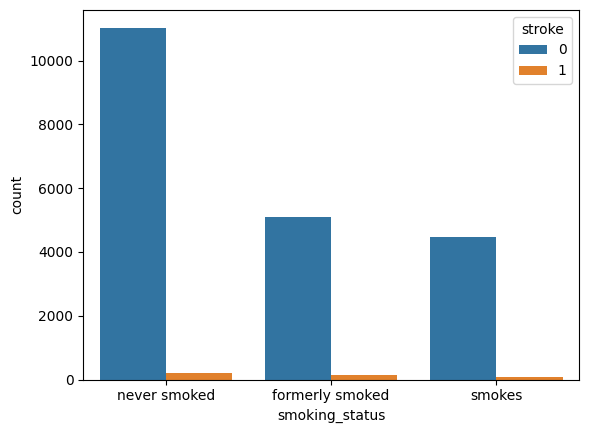

In [92]:
# Describe proportion of stroke by `smoking_status`
sns.countplot(data = data_train,
              x = 'smoking_status',
              hue = response_variable)

In [93]:
# Calculate odds of default from predictor 'smoking_status'
odds_smoking = calculate_odds(data = data_train,
                              predictor_label = 'smoking_status')

odds_smoking

stroke,0,1,Odds
smoking_status,,,
formerly smoked,5097,152,0.030
smokes,4467,93,0.021
never smoked,11033,198,0.018


In [94]:
# Calculate odds of default from predictor 'smoking_status'
odds_smoking = calculate_odds(data = data_train,
                              predictor_label = 'smoking_status')

odds_smoking

stroke,0,1,Odds
smoking_status,,,
formerly smoked,5097,152,0.030
smokes,4467,93,0.021
never smoked,11033,198,0.018


**Summary**
- More than 50% of our sample are those who never smoked.
- Less than 25% of our sample are smokers, where the remaining are the respondents who formerly smoked.

**Pre-processing Plan:**
- We don't have sampling zeros from `smoking_status` variable.
- We have a large number of missing values, thus
  - We will impute the missing values by the mode.

## **4. Pre-processing Training Set**
---

### Impute Missing Values
---

From EDA, we know some of our variables have missing values.

In [95]:
# Check for missing values
data_train.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   991
smoking_status       9330
stroke                  0
dtype: int64

<center>

|Predictors|Imputation Strategy|
|:--|:--|
|`bmi`|`median`|
|`smoking_status`|`most_frequent`|

</center>

First, create an imputer function to impute missing values from:
- numerical variable, `bmi`, and
- categorical variable, `smoking_status`.

In [96]:
# We use sklearn imputer
from sklearn.impute import SimpleImputer

# Create a function to impute missing values with median
def fit_median_imputer(data, cols):
    '''Create imputer with median. Note: create imputer from data train only'''
    # Create imputer
    imputer = SimpleImputer(missing_values = np.nan,
                            strategy = 'median')

    # Fit imputer
    imputer.fit(data[cols])

    return imputer

# Create a function to impute missing values with mode
def fit_mode_imputer(data, cols):
    '''Create imputer with mode. Note: create imputer from data train only'''
    # Create imputer
    imputer = SimpleImputer(missing_values = np.nan,
                            strategy = 'most_frequent')

    # Fit imputer
    imputer.fit(data[cols])

    return imputer

In [97]:
# Create transform data from imputer
def transform_imputer(data, cols, imputer):
    '''Transform data train/data test with numerical imputer'''
    data = data.copy()

    # Filter numerical data
    num_data = data[cols]

    # Transform imputer
    num_data_imputed = imputer.transform(num_data)

    # Replace the original data with imputed data
    data[cols] = num_data_imputed

    return data

In [98]:
# First, fit the imputer
median_imputer = fit_median_imputer(data = data_train,
                                    cols = ['bmi'])

mode_imputer = fit_mode_imputer(data = data_train,
                                cols = ['smoking_status'])

In [99]:
data_train.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   991
smoking_status       9330
stroke                  0
dtype: int64

In [100]:
# Then perform imputation. Imputation pipeline:
# 1. impute `bmi` with median
# 2. impute `smoking_status` with mode

# 1.
data_imputed = transform_imputer(data = data_train,
                                 cols = ['bmi'],
                                 imputer = median_imputer)

# 2.
data_imputed = transform_imputer(data = data_imputed,
                                 cols = ['smoking_status'],
                                 imputer = mode_imputer)

In [101]:
data_imputed.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

All missing values are imputed. Next, we will remove the outliers.

### Remove Outliers
---

We will remove the outliers from `bmi`. First, define the outliers condition.

In [102]:
# Calculate Q1 and Q3
Q1_bmi = np.percentile(data_imputed['bmi'], 25)
Q3_bmi = np.percentile(data_imputed['bmi'], 75)

# Calculate IQR
IQR_bmi = Q3_bmi - Q1_bmi

# Calculate the thresholds
min_bmi = Q1_bmi - 1.5*IQR_bmi
max_bmi = Q3_bmi + 1.5*IQR_bmi

min_bmi, max_bmi

(9.599999999999994, 46.400000000000006)

From the IQR, respondents with BMI lower than 9.59 and higher than 46.40 are outliers.

Since we don't have sample with BMI lower than 9.59, we will only remove the sample with BMI higher than 46.40.

In [103]:
# Define the outliers
outliers_min = data_imputed['bmi'] < min_bmi
outliers_max = data_imputed['bmi'] > max_bmi
outliers_bmi = np.where(outliers_min | outliers_max)[0]

# Check the number of outliers in data_imputed
n_outliers = len(outliers_bmi)
n_outliers

746

Thus we will remove 746 respondents from our sample.

In [104]:
# Check the shape of data_imputed before pre processing
data_imputed_old_shape = data_imputed.shape
print('data_imputed old shape :', data_imputed_old_shape)

data_imputed old shape : (30370, 11)


In [105]:
# Define clean data without outliers
clean_min = data_imputed['bmi'] >= min_bmi
clean_max = data_imputed['bmi'] <= max_bmi

clean = clean_min & clean_max

# Remove outliers
data_clean = data_imputed[clean]

In [106]:
# Check the new shape
data_clean_new_shape = data_clean.shape
print('data_clean new shape :', data_clean_new_shape)

data_clean new shape : (29624, 11)


In [107]:
data_clean['gender'].value_counts()

gender
Female    17402
Male      12222
Name: count, dtype: int64

In [108]:
# Validate the new shape
data_imputed_old_shape[0] - n_outliers

29624

Now we have sample of 29,624 respondents in `data_clean` without missing values and outliers.

Let's check the distribution plot after removing outliers.

<Axes: xlabel='bmi', ylabel='Count'>

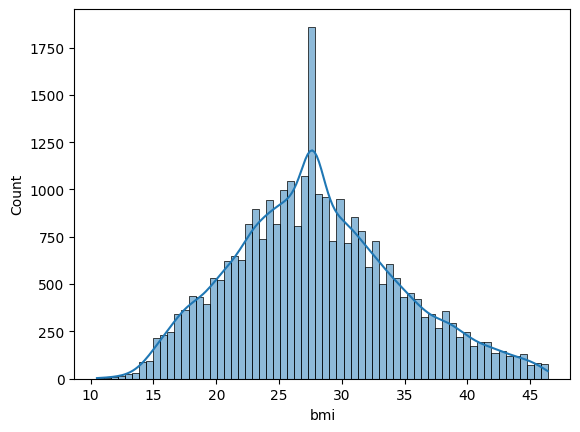

In [109]:
# Distribution plot of bmi
sns.histplot(data = data_clean,
             x = 'bmi',
             kde = True)

Before modeling with `data_clean`, let's check the empty cell from predictor `work_type`.

### Sampling Zeros Remedy
---

We still have the empty cell from predictor `work_type` in `data_clean`.

In [110]:
# Create the contingency table
stroke_by_work_type = pd.crosstab(data_clean['work_type'],
                                  data_clean[response_variable])

stroke_by_work_type

stroke,0,1
work_type,,
Govt_job,3630,65
Never_worked,126,0
Private,16560,300
Self-employed,4483,176
children,4283,1


Here we will collapse two categories `Never_worked` and `children`.

In [111]:
# Replace the category children as Never_worked
data_clean.loc[:, 'work_type_remedy'] = data_clean['work_type'].replace(['children'], 'Never_worked')

/tmp/ipykernel_2591/3451072781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.loc[:, 'work_type_remedy'] = data_clean['work_type'].replace(['children'], 'Never_worked')


Check the contingency table.

In [112]:
# Create the contingency table
crosstab = pd.crosstab(data_clean['work_type_remedy'],
                       data_clean[response_variable])

crosstab

stroke,0,1
work_type_remedy,,
Govt_job,3630,65
Never_worked,4409,1
Private,16560,300
Self-employed,4483,176


Now we don't have sampling zeros in predictor `work_type_remedy`.

Next, we need to preprocess our categorical (`object`) predictors into dummy variables.

### Make Dummies
---

In [113]:
# Table check
data_clean.head().T

,5473,26630,17083,4730,19154
gender,Male,Female,Male,Male,Female
age,7.0,53.0,26.0,7.0,44.0
hypertension,0,0,0,0,0
heart_disease,0,1,0,0,0
ever_married,No,No,No,No,Yes
work_type,children,Private,Private,children,Private
Residence_type,Rural,Urban,Rural,Urban,Urban
avg_glucose_level,102.78,94.68,88.28,77.12,84.55
bmi,18.1,27.7,36.3,18.6,44.5
smoking_status,never smoked,never smoked,never smoked,never smoked,never smoked


In [114]:
# Check the variable's type
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29624 entries, 5473 to 21868
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             29624 non-null  object 
 1   age                29624 non-null  float64
 2   hypertension       29624 non-null  int64  
 3   heart_disease      29624 non-null  int64  
 4   ever_married       29624 non-null  object 
 5   work_type          29624 non-null  object 
 6   Residence_type     29624 non-null  object 
 7   avg_glucose_level  29624 non-null  float64
 8   bmi                29624 non-null  float64
 9   smoking_status     29624 non-null  object 
 10  stroke             29624 non-null  int64  
 11  work_type_remedy   29624 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 2.9+ MB


We have 3 numerical predictors and 7 categorical predictors:
- Numerical Predictors
  1. `age`
  2. `avg_glucose_level`
  3. `bmi`
- Categorical Predictors
  1. `gender` (binary)
  2. `hypertension` (binary)
  3. `heart_disease` (binary)
  4. `ever_married` (binary)
  5. `Residence_type` (binary)
  6. `smoking_status` (multicategory)
  7. `work_type_remedy` (multicategory)

Next, we will make dummies for some categorical predictors with type of object.
1. `gender` (binary)
2. `ever_married` (binary)
3. `Residence_type` (binary)
4. `smoking_status` (multicategory)
5. `work_type_remedy` (multicategory)

In [115]:
# Create dummy variables for gender (1: Male, 0: Female)
data_clean[['Male']] = pd.get_dummies(data_clean['gender'],
                                      drop_first = True)

/tmp/ipykernel_2591/1315114691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[['Male']] = pd.get_dummies(data_clean['gender'],


In [116]:
# Create dummy variables for ever_married (1: Yes, 0: No)
data_clean[['Married']] = pd.get_dummies(data_clean['ever_married'],
                                         drop_first = True)

/tmp/ipykernel_2591/677488245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[['Married']] = pd.get_dummies(data_clean['ever_married'],


In [117]:
# Create dummy variables for Residence_type (1: Urban, 0: Rural)
data_clean[['Urban']] = pd.get_dummies(data_clean['Residence_type'],
                                       drop_first = True)

/tmp/ipykernel_2591/3721962207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[['Urban']] = pd.get_dummies(data_clean['Residence_type'],


In [118]:
# Create dummy variables for smoking_status (reference: formerly smoked)
data_clean[['Never_smoked',
            'Smokes']] = pd.get_dummies(data_clean['smoking_status'],
                                        drop_first = True)

/tmp/ipykernel_2591/3849544548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[['Never_smoked',
/tmp/ipykernel_2591/3849544548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[['Never_smoked',


In [119]:
# Create dummy variables for work_type_remedy (reference: Govt_job)
data_clean[['Never_worked',
            'Private',
            'Self_employed']] = pd.get_dummies(data_clean['work_type_remedy'],
                                               drop_first = True)

/tmp/ipykernel_2591/1366073500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[['Never_worked',
/tmp/ipykernel_2591/1366073500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[['Never_worked',
/tmp/ipykernel_2591/1366073500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [120]:
data_clean

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_remedy,Male,Married,Urban,Never_smoked,Smokes,Never_worked,Private,Self_employed
5473,Male,7.0,0,0,No,children,Rural,102.78,18.1,never smoked,0,Never_worked,True,False,False,True,False,True,False,False
26630,Female,53.0,0,1,No,Private,Urban,94.68,27.7,never smoked,0,Private,False,False,True,True,False,False,True,False
17083,Male,26.0,0,0,No,Private,Rural,88.28,36.3,never smoked,0,Private,True,False,False,True,False,False,True,False
4730,Male,7.0,0,0,No,children,Urban,77.12,18.6,never smoked,0,Never_worked,True,False,True,True,False,True,False,False
19154,Female,44.0,0,0,Yes,Private,Urban,84.55,44.5,never smoked,0,Private,False,True,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13177,Female,79.0,0,0,Yes,Self-employed,Rural,69.94,26.3,formerly smoked,0,Self-employed,False,True,False,False,False,False,False,True
26825,Male,50.0,1,0,Yes,Govt_job,Rural,120.10,37.4,never smoked,0,Govt_job,True,True,False,True,False,False,False,False
29307,Female,20.0,0,0,No,Private,Urban,80.02,29.0,smokes,0,Private,False,False,True,False,True,False,True,False
41585,Male,53.0,0,0,Yes,Private,Urban,100.20,39.0,never smoked,0,Private,True,True,True,True,False,False,True,False


From 3 numerical predictors and 7 categorical predictors, we will have 13 potential predictors including dummies.
  1. `age`
  2. `avg_glucose_level`
  3. `bmi`
  4. `Male`
  5. `hypertension`
  6. `heart_disease`
  7. `Married`
  8. `Urban`
  9. `Never_smoked`
  10. `Smokes`
  11. `Never_worked`
  12. `Private`
  13. `Self_employed`

We need to redefine `data_clean`.

In [121]:
# Redefine the training set
data_clean = data_clean[['age',
                         'avg_glucose_level',
                         'bmi',
                         'Male',
                         'hypertension',
                         'heart_disease',
                         'Married',
                         'Urban',
                         'Never_smoked',
                         'Smokes',
                         'Never_worked',
                         'Private',
                         'Self_employed',
                         'stroke']]

data_clean.head().T

,5473,26630,17083,4730,19154
age,7.0,53.0,26.0,7.0,44.0
avg_glucose_level,102.78,94.68,88.28,77.12,84.55
bmi,18.1,27.7,36.3,18.6,44.5
Male,True,False,True,True,False
hypertension,0,0,0,0,0
heart_disease,0,1,0,0,0
Married,False,False,False,False,True
Urban,False,True,False,True,True
Never_smoked,True,True,True,True,True
Smokes,False,False,False,False,False


### Data Balancing
---

In [122]:
# Check training set
print('data_train old shape:', data_clean.shape)

data_train old shape: (29624, 14)


In [123]:
# Check the counts of response variable
data_clean[response_variable].value_counts()

stroke
0    29082
1      542
Name: count, dtype: int64

The proportion of the response variable, `stroke`, is highly imbalanced (in a ratio of 29,822:542).

We will perform Random Undersampling (RUS) and Random Oversampling (ROS).

<Axes: xlabel='stroke', ylabel='count'>

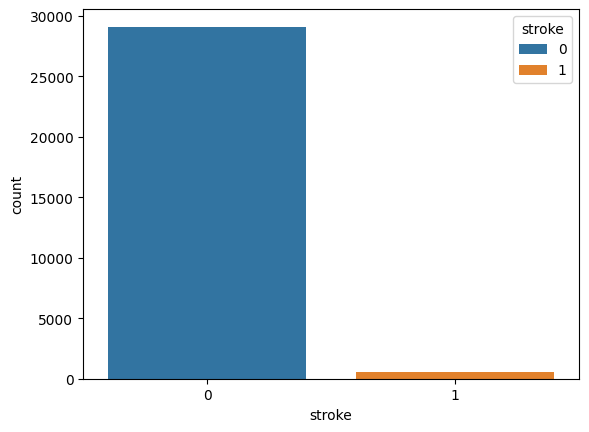

In [124]:
# Check the proportion before RUS
sns.countplot(data = data_clean,
              x = response_variable,
              hue = response_variable,
              dodge = False)

#### **Random Undersampling (RUS)**
---

Perform Random Undersampling using `RandomUnderSampler` package from `imblearn.under_sampling`.

In [125]:
!pip install imblearn

     |████████████████████████████████| 258 kB 2.9 MB/s eta 0:00:01


In [126]:
from imblearn.under_sampling import RandomUnderSampler

def rus_fit_resample(data_train: pd.DataFrame, response_variable) -> pd.DataFrame:

    # Create copy of set data
    data_train = data_train.copy()

    # Create sampling object
    rus = RandomUnderSampler(random_state = 42)

    # Balancing data set
    x_rus, y_rus = rus.fit_resample(data_train.drop([response_variable], axis = 1),
                                    data_train[response_variable])

    # Concatenate balanced data set
    data_train_rus = pd.concat([x_rus, y_rus], axis = 1)

    # Return balanced data set
    return data_train_rus

In [127]:
# Perform RUS
data_train_rus = rus_fit_resample(data_train = data_clean,
                                  response_variable = response_variable)

<Axes: xlabel='stroke', ylabel='count'>

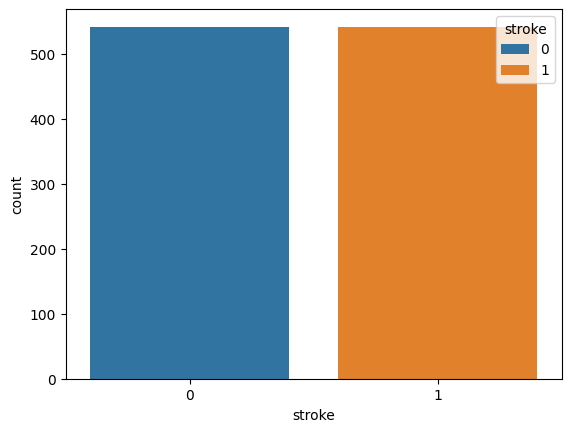

In [128]:
# Check the proportion of response categories
sns.countplot(data = data_train_rus,
              x = response_variable,
              hue = response_variable,
              dodge = False)

In [129]:
# Check the balanced response
data_train_rus[response_variable].value_counts()

stroke
0    542
1    542
Name: count, dtype: int64

#### **Random Oversampling (ROS)**
---

Perform Random Oversampling using `RandomOverSampler` package from `imblearn.over_sampling`.

In [130]:
from imblearn.over_sampling import RandomOverSampler

def ros_fit_resample(data_train: pd.DataFrame, response_variable) -> pd.DataFrame:

    # Create copy of set data
    data_train = data_train.copy()

    # Create sampling object
    ros = RandomOverSampler(random_state = 42)

    # Balancing data set
    x_ros, y_ros = ros.fit_resample(data_train.drop([response_variable], axis = 1),
                                    data_train[response_variable])

    # Concatenate balanced data set
    data_train_ros = pd.concat([x_ros, y_ros], axis = 1)

    # Return balanced data set
    return data_train_ros

In [131]:
# Perform ROS
data_train_ros = ros_fit_resample(data_train = data_clean,
                                  response_variable = response_variable)

<Axes: xlabel='stroke', ylabel='count'>

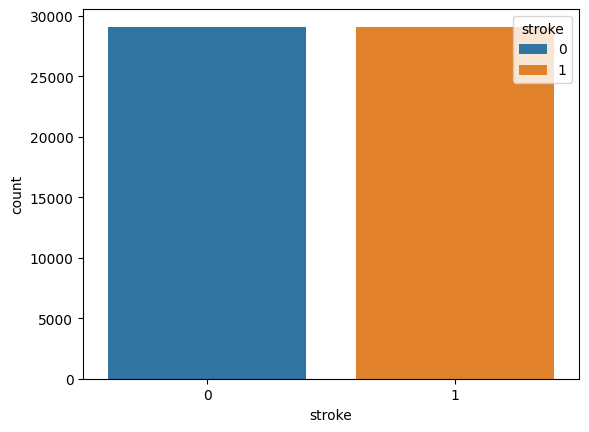

In [132]:
# Check the proportion of response categories
sns.countplot(data = data_train_ros,
              x = response_variable,
              hue = response_variable,
              dodge = False)

In [133]:
# Check the balanced response
data_train_ros[response_variable].value_counts()

stroke
0    29082
1    29082
Name: count, dtype: int64

## **5. Pre-processing Testing Set**
---

First, we process the test data according to the pre-processing pipeline in train data.

In [134]:
# Concatenate X_test and y_test as data_test
data_test = pd.concat((X_test, y_test), axis=1)

# Validate data_test
print('Test data shape:', data_test.shape)

Test data shape: (13020, 11)


In [135]:
# Table check
data_test.head().T

,12138,7817,4791,33263,1063
gender,Female,Male,Female,Male,Male
age,37.0,26.0,49.0,65.0,46.0
hypertension,0,0,0,0,1
heart_disease,0,0,0,0,0
ever_married,Yes,No,Yes,Yes,Yes
work_type,Self-employed,Private,Private,Private,Private
Residence_type,Rural,Rural,Urban,Urban,Rural
avg_glucose_level,77.58,103.79,77.93,123.16,73.72
bmi,23.8,27.3,39.1,27.9,NaN
smoking_status,never smoked,NaN,smokes,formerly smoked,smokes


##### 1. Remove gender 'Other'.

In [136]:
# Remove gender 'Other' from data_test
data_test.drop(data_test[(data_test['gender'] == 'Other')].index,
               inplace = True)

In [137]:
data_test.shape

(13019, 11)

##### 2. Impute Missing Values

In [138]:
# Check for missing values
data_test.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   467
smoking_status       3960
stroke                  0
dtype: int64

In [139]:
# Then perform imputation. Imputation pipeline:
# 1. impute `bmi` with median
# 2. impute `smoking_status` with mode

# 1.
data_test_imputed = transform_imputer(data = data_test,
                                      cols = ['bmi'],
                                      imputer = median_imputer)

# 2.
data_test_clean = transform_imputer(data = data_test_imputed,
                                      cols = ['smoking_status'],
                                      imputer = mode_imputer)

In [140]:
data_test_clean.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Finally, there's no variable with missing values in our testing set.

##### 3. Create `work_type_remedy` Variable

In [141]:
# Replace the category children as Never_worked
data_test_clean['work_type_remedy'] = data_test_clean['work_type'].replace(['children'], 'Never_worked')

##### 4. Make Dummies

Next, we will make dummies for some categorical predictors with type of object.
  1. `gender` (binary)
  2. `ever_married` (binary)
  3. `Residence_type` (binary)
  4. `smoking_status` (multicategory)
  5. `work_type_remedy` (multicategory)

In [142]:
# Create dummy variables for gender (1: Male, 0: Female)
data_test_clean[['Male']] = pd.get_dummies(data_test_clean['gender'],
                                           drop_first = True)

In [143]:
# Create dummy variables for ever_married (1: Yes, 0: No)
data_test_clean[['Married']] = pd.get_dummies(data_test_clean['ever_married'],
                                              drop_first = True)

In [144]:
# Create dummy variables for Residence_type (1: Urban, 0: Rural)
data_test_clean[['Urban']] = pd.get_dummies(data_test_clean['Residence_type'],
                                            drop_first = True)

In [145]:
# Create dummy variables for smoking_status (reference: formerly smoked)
data_test_clean[['Never_smoked',
                 'Smokes']] = pd.get_dummies(data_test_clean['smoking_status'],
                                             drop_first = True)

In [146]:
# Create dummy variables for work_type_remedy (reference: Govt_job)
data_test_clean[['Never_worked',
                 'Private',
                 'Self_employed']] = pd.get_dummies(data_test_clean['work_type_remedy'],
                                                    drop_first = True)

From 3 numerical predictors and 7 categorical predictors, we will have 13 potential predictors including dummies.
  1. `age`
  2. `avg_glucose_level`
  3. `bmi`
  4. `Male`
  5. `hypertension`
  6. `heart_disease`
  7. `Married`
  8. `Urban`
  9. `Never_smoked`
  10. `Smokes`
  11. `Never_worked`
  12. `Private`
  13. `Self_employed`

We need to redefine `data_test_clean`.

In [147]:
# Redefine the testing set
data_test_clean = data_test_clean[['age',
                                   'avg_glucose_level',
                                   'bmi',
                                   'Male',
                                   'hypertension',
                                   'heart_disease',
                                   'Married',
                                   'Urban',
                                   'Never_smoked',
                                   'Smokes',
                                   'Never_worked',
                                   'Private',
                                   'Self_employed',
                                   'stroke']]

data_test_clean.head().T

,12138,7817,4791,33263,1063
age,37.0,26.0,49.0,65.0,46.0
avg_glucose_level,77.58,103.79,77.93,123.16,73.72
bmi,23.8,27.3,39.1,27.9,27.7
Male,False,True,False,True,True
hypertension,0,0,0,0,1
heart_disease,0,0,0,0,0
Married,True,False,True,True,True
Urban,False,False,True,True,False
Never_smoked,True,True,False,False,False
Smokes,False,False,True,False,True


In [148]:
# Split response and predictors
y_test = data_test_clean[response_variable]
X_test = data_test_clean.drop(columns=[response_variable], axis=1)

# Convert dataframe to numpy
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

# Validate the splitting
print('y_test shape :', y_test.shape)
print('X_test shape :', X_test.shape)

y_test shape : (13019,)
X_test shape : (13019, 13)


We are ready to evaluate the best model on `X_test`.

## **6. Model Selection**
---

Next, we will perform variable selection to decide which predictor variables give the optimum model estimation fit.

We call that optimum model as the best model from the variable selection.

- We will use the **Forward Selection** procedure since we have relatively many predictors.
- We use the **AIC** value to choose the best model, in which the model with the smallest AIC is the best model.
- To find the valid AIC value from each possible model, we use **5-Fold Cross-Validation** to calculate the AIC score.

We will perform model selection to find the best model from each training set:
1. The original training set
2. The original training set using `class_weight`
3. Random undersampling training set
4. Random oversampling training set

### Load Functions for Model Selection
---

AIC, KFold, and Forward Selection

In [149]:
def AIC(y_true, y_pred, p):
    """
    Function to split sample with validation set approach.

    Parameters
    ----------
    y_true : {array-like} of shape (n_sample, )
        Actual value of response variable.

    y_pred : {array-like} of shape (n_sample, 1)
        The success probability of X.

    p : int
        Number of parameters in model.

    Returns
    -------
    aic : float
        AIC value.
    """
    # Find the average log likelihood value
    llf = np.mean(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))

    # AIC value is sensitive to number of parameters
    # The average log likelihood represent value for 1 unit observation
    # AIC from average llf is not comparable
    # Multiply llf by n_sample of training set to make its AIC comparable
    llf *= data_clean.shape[0]

    # Calculate AIC
    aic = -2 * (llf - p)

    return aic

In [150]:
def kfold_split(X, k=5, random_state=42):
    """
    Function to split sample with validation set approach.

    Parameters
    ----------
    X : {array-like} of shape (n_sample, n_predictors)
        All predictors set.

    k : int, default = 5
        Number of folds.

    random_state : int
        Pass an int for reproducible output across multiple function calls.

    Returns
    -------
    train_ind_list : list
        Contains data index of train set.

    valid_ind_list : list
        Contains data index of validation set.
    """
    # Extract sample size
    n_samples, _ = X.shape

    # Set random state
    np.random.seed(random_state)

    # # Randomize index
    random_ind = np.random.choice(n_samples,
                                  size = n_samples,
                                  replace = False)

    # Calculate size of each fold
    fold_sizes = np.ones(k, dtype=int) * (n_samples//k)
    fold_sizes[:n_samples%k] += 1

    # Define initial list for each train and valid index
    train_ind_list = []
    valid_ind_list = []

    # Split sample
    current_ind = 0
    for size in fold_sizes:
        # Define index
        start_ind = current_ind
        end_ind = current_ind + size

        # Slice valid set
        # One fold for valid set, the remaining for train set
        valid_ind = random_ind[start_ind:end_ind]
        train_ind = np.concatenate((random_ind[:start_ind],
                                    random_ind[end_ind:]))

        # Update current index
        current_ind = end_ind

        # Append train and valid index in list
        train_ind_list.append(train_ind)
        valid_ind_list.append(valid_ind)

    return train_ind_list, valid_ind_list

In [151]:
# Import logistic regression package
from sklearn.linear_model import LogisticRegression

def cross_validate(X, y, method, cv, class_weight=None, random_state=42):
    """
    Function to evaluate AIC by cross-validation method.

    Parameters
    ----------
    X : {array-like} of shape (n_sample, n_predictors)
        The independent variable or predictors.

    y : {array-like} of shape (n_sample, )
        The dependent or response variable.

    method : cross-validation splitter
        Cross-validation method.

    cv : int
        Number of folds for k-Fold CV.

    random_state : int, default=42
        Pass an int for reproducible output across multiple function calls.

    Returns
    -------
    score : float
        The average AIC score.
    """
    # Split train and valid set based on CV method
    if method == "validation_set":
        train_ind_list, valid_ind_list = validation_set_split(X = X,
                                                              random_state = random_state)
    elif method == "loocv":
        train_ind_list, valid_ind_list = loocv_split(X = X)
    elif method == "kfold":
        train_ind_list, valid_ind_list = kfold_split(X = X,
                                                     k = cv,
                                                     random_state = random_state)

    # Define the number of train sets
    n_split = len(train_ind_list)

    # Initialize AIC score list for each valid set
    score_list = []

    for i in range(n_split):
        # Extract data from index
        X_train = X[train_ind_list[i]]
        y_train = y[train_ind_list[i]]
        X_valid = X[valid_ind_list[i]]
        y_valid = y[valid_ind_list[i]]

        # Fitting model
        model = LogisticRegression(penalty = None,
                                   class_weight = class_weight)
        model.fit(X_train, y_train)

        # Calculate success probability
        pred_train = model.predict_proba(X_train)
        pred_valid = model.predict_proba(X_valid)

        y_pred_train = pred_train[:,1]
        y_pred_valid = pred_valid[:,1]

        # Calculate AIC
        aic_train = AIC(y_true = y_train,
                        y_pred = y_pred_train,
                        p = X_train.shape[1]+1)
        aic_valid = AIC(y_true = y_valid,
                        y_pred = y_pred_valid,
                        p = X_train.shape[1]+1)

        # Append AIC score in list
        score_list.append(aic_valid)

    # Calculate CV Score
    score = np.mean(score_list)

    return score

In [152]:
def forward(X, y, predictors, method, cv=5, class_weight=None, random_state=42):
    """
    Function to perform best subset selection procedure.

    Parameters
    ----------
    X : {array-like} of shape (n_sample, n_predictors)
        All predictors set.

    y : {array-like} of shape (n_sample, )
        The dependent or response variable.

    predictors : {array-like} of shape (n_sample, )
        Index of predictors

    method : cross-validation splitter
        Cross-validation method.

    cv : int, default=5
        Number of folds for k-Fold CV.

    random_state : int, default=42
        Pass an int for reproducible output across multiple function calls.

    Returns
    -------
    models : {array-like} of shape (n_combinations, k)
        Summary of predictors and its AIC score for each possible combination.

    best_model : {array-like} of shape (2, )
        Best model of models with the smallest AIC score.
    """

    # Initialize list of results
    results = []

    # Define sample size and  number of all predictors
    n_samples, n_predictors = X.shape

    # Define list of all predictors
    col_list = np.arange(n_predictors)

    # Define remaining predictors for each k
    remaining_predictors = [p for p in col_list if p not in predictors]

    # Initialize list of predictors and its CV Score
    pred_list = []
    score_list = []

    # Cross validate each possible combination of remaining predictors
    for p in remaining_predictors:
        combi = predictors + [p]

        # Extract predictors combination
        X_ = X[:, combi]
        y_ = y

        # Cross validate to get CV Score
        score_ = cross_validate(X = X_,
                                y = y_,
                                method = method,
                                cv = cv,
                                class_weight = class_weight,
                                random_state = random_state)

        # Append predictors combination and its CV Score to the list
        pred_list.append(list(combi))
        score_list.append(score_)

    # Tabulate the results
    models = pd.DataFrame({"Predictors": pred_list,
                            "AIC": score_list})

    # Choose the best model
    best_model = models.loc[models["AIC"].argmin()]

    return models, best_model

We are ready to perform the Forward Selection procedure.

- Begin with fitting the null model.
- Then perform the Forward Selection procedure by adding one predictor that make the smallest AIC score, one-at-a-time.
- Therefore, from `X_train` containing 13 predictors, we will have 13 best models from each possible number of predictors in model.

### **1. The Original Training Set**
---

In [153]:
# Split response and predictors
y_train = data_clean[response_variable]
X_train = data_clean.drop(columns=[response_variable], axis=1)

# Convert dataframe to numpy
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

# Validate
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

X_train shape: (29624, 13)
y_train shape: (29624,)


Fit the null (constant) model.

In [154]:
import itertools

# Fit null model
predictor = []
score_ = cross_validate(X = X_train[:, [1]],
                        y = y_train,
                        method = 'kfold',
                        cv = 5,
                        random_state = 42)

# Create table for the best model of each k predictors
# Append the results of null model
forward_models = pd.DataFrame({"Predictors": [predictor],
                               "AIC": [score_]})

forward_models

,Predictors,AIC
0,[],5233.912907


Perform the forward selection procedure.

In [155]:
# Define list of predictors
predictors = []
n_predictors = X_train.shape[1]

# Perform forward selection procedure for k=1,...,13 predictors
for k in range(n_predictors):
    _, best_model = forward(X = X_train,
                            y = y_train,
                            predictors = predictors,
                            method = "kfold",
                            cv = 5,
                            random_state = 42)

    # Tabulate the best model of each k predictors
    forward_models.loc[k+1] = best_model
    predictors = best_model["Predictors"]

/home/ubuntu/learning/credit_scoring/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubuntu/learning/credit_scoring/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

In [156]:
# Print the best model of each k predictors
forward_models

,Predictors,AIC
0,[],5233.912907
1,[0],4532.604147
2,"[0, 5]",4479.227620
3,"[0, 5, 1]",4447.806523
4,"[0, 5, 1, 4]",4447.618246
5,"[0, 5, 1, 4, 2]",4447.768400
6,"[0, 5, 1, 4, 2, 7]",4450.106413
7,"[0, 5, 1, 4, 2, 7, 3]",4451.551277
8,"[0, 5, 1, 4, 2, 7, 3, 12]",4456.256137
9,"[0, 5, 1, 4, 2, 7, 3, 12, 10]",4461.768231


Next, find the best model with the smallest AIC score.

In [157]:
# Find the best AIC score
best_idx = forward_models['AIC'].argmin()
best_AIC = forward_models['AIC'].loc[best_idx]
best_predictors = forward_models['Predictors'].loc[best_idx]

# print
print('Best index            :', best_idx)
print('Best AIC              :', best_AIC)
print('Best predictors (idx) :', best_predictors)
print('Best predictors       :')
print(data_clean.columns[best_predictors].tolist())

Best index            : 4
Best AIC              : 4447.618245550511
Best predictors (idx) : [0, 5, 1, 4]
Best predictors       :
['age', 'heart_disease', 'avg_glucose_level', 'hypertension']


**Refit** the best model on whole `X_train` data.

In [158]:
# Define X with best predictors
X_train_best = X_train[:, best_predictors]

# Fit best model
best_model_ori = LogisticRegression(penalty = None,
                                    class_weight = None)
best_model_ori.fit(X_train_best, y_train)

LogisticRegression(penalty=None)

### **2. Using `class_weight`**
---

In [159]:
# Fit null model
predictor = []
score_ = cross_validate(X = X_train[:, [1]],
                        y = y_train,
                        method = 'kfold',
                        cv = 5,
                        class_weight = 'balanced',
                        random_state = 42)

# Create table for the best model of each k predictors
# Append the results of null model
forward_models_weight = pd.DataFrame({"Predictors": [predictor],
                                      "AIC": [score_]})

forward_models_weight

,Predictors,AIC
0,[],38574.414038


Perform the forward selection procedure.

In [160]:
# Define list of predictors
predictors = []
n_predictors = X_train.shape[1]

# Perform forward selection procedure for k=1,...,13 predictors
for k in range(n_predictors):
    _, best_model = forward(X = X_train,
                            y = y_train,
                            predictors = predictors,
                            method = "kfold",
                            cv = 5,
                            class_weight = 'balanced',
                            random_state = 42)

    # Tabulate the best model of each k predictors
    forward_models_weight.loc[k+1] = best_model
    predictors = best_model["Predictors"]

/home/ubuntu/learning/credit_scoring/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubuntu/learning/credit_scoring/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

In [161]:
# Print the best model of each k predictors
forward_models_weight

,Predictors,AIC
0,[],38574.414038
1,[0],30243.369727
2,"[0, 5]",29580.605965
3,"[0, 5, 1]",29176.839759
4,"[0, 5, 1, 4]",29094.571486
5,"[0, 5, 1, 4, 9]",29068.780162
6,"[0, 5, 1, 4, 9, 10]",29054.175172
7,"[0, 5, 1, 4, 9, 10, 3]",29038.075722
8,"[0, 5, 1, 4, 9, 10, 3, 6]",29049.404564
9,"[0, 5, 1, 4, 9, 10, 3, 6, 2]",29046.209068


Next, find the best model with the smallest AIC score.

In [162]:
# Find the best AIC score
best_idx_weight = forward_models_weight['AIC'].argmin()
best_AIC_weight = forward_models_weight['AIC'].loc[best_idx_weight]
best_predictors_weight = forward_models_weight['Predictors'].loc[best_idx_weight]

# print
print('Best index            :', best_idx_weight)
print('Best AIC              :', best_AIC_weight)
print('Best predictors (idx) :', best_predictors_weight)
print('Best predictors       :')
print(data_clean.columns[best_predictors_weight].tolist())

Best index            : 10
Best AIC              : 29020.42769721359
Best predictors (idx) : [0, 5, 1, 4, 9, 10, 3, 6, 2, 8]
Best predictors       :
['age', 'heart_disease', 'avg_glucose_level', 'hypertension', 'Smokes', 'Never_worked', 'Male', 'Married', 'bmi', 'Never_smoked']


**Refit** the best model on whole `X_train` data.

In [163]:
# Define X with best predictors
X_train_best_weight = X_train[:, best_predictors_weight]

# Fit best model
best_weight_model = LogisticRegression(penalty = None,
                                       class_weight = 'balanced')
best_weight_model.fit(X_train_best_weight, y_train)

/home/ubuntu/learning/credit_scoring/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', penalty=None)

### **3. RUS Training Set**
---

In [164]:
# Split response and predictors
y_train_rus = data_train_rus[response_variable]
X_train_rus = data_train_rus.drop(columns=[response_variable], axis=1)

# Convert dataframe to numpy
X_train_rus = X_train_rus.to_numpy()
y_train_rus = y_train_rus.to_numpy()

# Validate the splitting
print('y_train_rus shape :', y_train_rus.shape)
print('X_train_rus shape :', X_train_rus.shape)

y_train_rus shape : (1084,)
X_train_rus shape : (1084, 13)


Fit the null (constant) model.

In [165]:
# Fit null model
predictor = []
score_ = cross_validate(X = X_train_rus[:, [1]],
                        y = y_train_rus,
                        method = 'kfold',
                        cv = 5,
                        random_state = 42)

# Create table for the best model of each k predictors
# Append the results of null model
forward_models_rus = pd.DataFrame({"Predictors": [predictor],
                                   "AIC": [score_]})

forward_models_rus

,Predictors,AIC
0,[],39059.613785


Perform the forward selection procedure.

In [166]:
# Define list of predictors
predictors = []
n_predictors = X_train_rus.shape[1]

# Perform forward selection procedure for k=1,...,13 predictors
for k in range(n_predictors):
    _, best_model = forward(X = X_train_rus,
                            y = y_train_rus,
                            predictors = predictors,
                            method = "kfold",
                            cv = 5,
                            random_state = 42)

    # Tabulate the best model of each k predictors
    forward_models_rus.loc[k+1] = best_model
    predictors = best_model["Predictors"]

/home/ubuntu/learning/credit_scoring/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubuntu/learning/credit_scoring/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

In [167]:
# Print the best model of each k predictors
forward_models_rus

,Predictors,AIC
0,[],39059.613785
1,[0],28362.267155
2,"[0, 1]",27968.284234
3,"[0, 1, 5]",27762.872633
4,"[0, 1, 5, 4]",27722.365386
5,"[0, 1, 5, 4, 7]",27739.281652
6,"[0, 1, 5, 4, 7, 6]",27771.691377
7,"[0, 1, 5, 4, 7, 6, 11]",27803.072683
8,"[0, 1, 5, 4, 7, 6, 11, 10]",27836.948586
9,"[0, 1, 5, 4, 7, 6, 11, 10, 8]",27883.612859


Next, find the best model with the smallest AIC score.

In [168]:
# Find the best AIC score
best_idx_rus = forward_models_rus['AIC'].argmin()
best_AIC_rus = forward_models_rus['AIC'].loc[best_idx_rus]
best_predictors_rus = forward_models_rus['Predictors'].loc[best_idx_rus]

# print
print('Best index            :', best_idx_rus)
print('Best AIC              :', best_AIC_rus)
print('Best predictors (idx) :', best_predictors_rus)
print('Best predictors       :')
print(data_train_rus.columns[best_predictors_rus].tolist())

Best index            : 4
Best AIC              : 27722.36538618284
Best predictors (idx) : [0, 1, 5, 4]
Best predictors       :
['age', 'avg_glucose_level', 'heart_disease', 'hypertension']


**Refit** the best model on whole `X_train_rus` data.

In [169]:
# Define X with best predictors
X_train_best_rus = X_train_rus[:, best_predictors_rus]

# Fit best model
best_rus_model = LogisticRegression(penalty = None,
                                    class_weight = None)
best_rus_model.fit(X_train_best_rus, y_train_rus)

LogisticRegression(penalty=None)

### **4. ROS Training Set**
---

In [170]:
# Split response and predictors
y_train_ros = data_train_ros[response_variable]
X_train_ros = data_train_ros.drop(columns=[response_variable], axis=1)

# Convert dataframe to numpy
X_train_ros = X_train_ros.to_numpy()
y_train_ros = y_train_ros.to_numpy()

# Validate the splitting
print('y_train_ros shape :', y_train_ros.shape)
print('X_train_ros shape :', X_train_ros.shape)

y_train_ros shape : (58164,)
X_train_ros shape : (58164, 13)


Fit the null (constant) model.

In [171]:
# Fit null model
predictor = []
score_ = cross_validate(X = X_train_ros[:, [1]],
                        y = y_train_ros,
                        method = 'kfold',
                        cv = 5,
                        random_state = 42)

# Create table for the best model of each k predictors
# Append the results of null model
forward_models_ros = pd.DataFrame({"Predictors": [predictor],
                                   "AIC": [score_]})

forward_models_ros

,Predictors,AIC
0,[],38912.958247


Perform the forward selection procedure.

In [172]:
# Define list of predictors
predictors = []
n_predictors = X_train_ros.shape[1]

# Perform forward selection procedure for k=1,...,13 predictors
for k in range(n_predictors):
    _, best_model = forward(X = X_train_ros,
                            y = y_train_ros,
                            predictors = predictors,
                            method = "kfold",
                            cv = 5,
                            random_state = 42)

    # Tabulate the best model of each k predictors
    forward_models_ros.loc[k+1] = best_model
    predictors = best_model["Predictors"]

/home/ubuntu/learning/credit_scoring/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubuntu/learning/credit_scoring/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

In [173]:
# Print the best model of each k predictors
forward_models_ros

,Predictors,AIC
0,[],38912.958247
1,[0],28318.683036
2,"[0, 5]",27816.250453
3,"[0, 5, 1]",27535.339474
4,"[0, 5, 1, 4]",27443.751824
5,"[0, 5, 1, 4, 12]",27428.273380
6,"[0, 5, 1, 4, 12, 8]",27414.568174
7,"[0, 5, 1, 4, 12, 8, 7]",27411.971214
8,"[0, 5, 1, 4, 12, 8, 7, 3]",27409.917661
9,"[0, 5, 1, 4, 12, 8, 7, 3, 10]",27410.011620


Next, find the best model with the smallest AIC score.

In [174]:
# Find the best AIC score
best_idx_ros = forward_models_ros['AIC'].argmin()
best_AIC_ros = forward_models_ros['AIC'].loc[best_idx_ros]
best_predictors_ros = forward_models_ros['Predictors'].loc[best_idx_ros]

# print
print('Best index            :', best_idx_ros)
print('Best AIC              :', best_AIC_ros)
print('Best predictors (idx) :', best_predictors_ros)
print('Best predictors       :')
print(data_train_ros.columns[best_predictors_ros].tolist())

Best index            : 8
Best AIC              : 27409.917660738847
Best predictors (idx) : [0, 5, 1, 4, 12, 8, 7, 3]
Best predictors       :
['age', 'heart_disease', 'avg_glucose_level', 'hypertension', 'Self_employed', 'Never_smoked', 'Urban', 'Male']


**Refit** the best model on whole `X_train_ros` data.

In [175]:
# Define X with best predictors
X_train_best_ros = X_train_ros[:, best_predictors_ros]

# Fit best model
best_ros_model = LogisticRegression(penalty = None,
                                    class_weight = None)
best_ros_model.fit(X_train_best_ros, y_train_ros)

/home/ubuntu/learning/credit_scoring/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty=None)

## **7. Model Evaluation**
---

We already have 4 best models from each method of preprocessing; there are the best model of:
1. The original training set
2. The original training set using `class_weight` algorithm
3. RUS training set
4. ROS training set

Next, we will compare the best models' performance by its
- AIC on validation set
- AIC on testing set
- AUC score

First, create a function to return those metrics.

In [176]:
# # Import metrics package
from sklearn import metrics
from sklearn.metrics import average_precision_score

def predict_test(X_test, y_test, model, predictors):

  # Calculate success probability
  X_test_best = X_test[:, predictors]
  pred_test = model.predict_proba(X_test_best)
  y_pred_test = pred_test[:,1]

  # Calculate AIC
  aic_test = AIC(y_true = y_test,
                 y_pred = y_pred_test,
                 p = X_test.shape[1]+1)

  # Calculate AUC
  auc = metrics.roc_auc_score(y_true = y_test,
                              y_score = y_pred_test)

  return y_pred_test, round(aic_test, 2), round(auc, 2)


### **1. The Original Training Set**
---

In [177]:
y_pred_test, aic_test, auc = predict_test(X_test = X_test,
                                          y_test = y_test,
                                          model = best_model_ori,
                                          predictors = best_predictors)

y_pred_test, aic_test, auc

(array([0.00337052, 0.001804  , 0.0076007 , ..., 0.0051191 , 0.02352993,
        0.01953419]),
 4504.57,
 0.85)

In [178]:
# Summarize in a table
model_eval = pd.Series({'Method': 'Original',
                        'Predictors' : best_predictors,
                        'AIC Valid': best_AIC,
                        'AIC Test' : aic_test,
                        'AUC' : auc})

model_eval = model_eval.to_frame()
model_eval

,0
Method,Original
Predictors,"[0, 5, 1, 4]"
AIC Valid,4447.618246
AIC Test,4504.57
AUC,0.85


Text(0.5, 0, 'Predicted Probability')

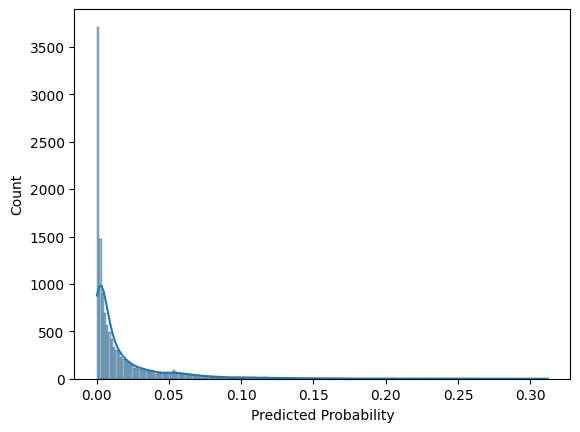

In [179]:
# Distribution plot of predicted probability
ax = sns.histplot(x = y_pred_test,
             kde = True)

ax.set_xlabel('Predicted Probability')

- The best model from imbalanced sample is difficult to predict `stroke = 1` or `y = 1`.
- The maximum value of the predicted probability is only about 0.3. Thus the model will always predict `stroke = 0` or `y = 0`.
- The AUC score of 0.85 is quite good. Thus, [Agresti](https://www.wiley.com/en-us/An+Introduction+to+Categorical+Data+Analysis%2C+3rd+Edition-p-9781119405283) suggests another possibility to take threshold/cut-off probability as the sample proportion of `y=1`. Therefore, we will get the better predictive performance.

### **2. Using `class_weight`**
---

In [181]:
y_pred_test_weight, aic_test_weight, auc_weight = predict_test(X_test = X_test,
                                                               y_test = y_test,
                                                               model = best_weight_model,
                                                               predictors = best_predictors_weight)

y_pred_test_weight, aic_test_weight, auc_weight

(array([0.13912802, 0.07817934, 0.29322146, ..., 0.20512417, 0.5973672 ,
        0.50748232]),
 28852.52,
 0.85)

In [182]:
# Summarize the class_weight model performance
weight_eval = pd.Series({'Method': 'Class_weight',
                        'Predictors' : best_predictors_weight,
                        'AIC Valid': best_AIC_weight,
                        'AIC Test' : aic_test_weight,
                        'AUC' : auc_weight})

# Concatenate to model_eval summary
model_eval = pd.concat([model_eval, weight_eval],
                       axis=1,
                       ignore_index=True)
model_eval

,0,1
Method,Original,Class_weight
Predictors,"[0, 5, 1, 4]","[0, 5, 1, 4, 9, 10, 3, 6, 2, 8]"
AIC Valid,4447.618246,29020.427697
AIC Test,4504.57,28852.52
AUC,0.85,0.85


Text(0.5, 0, 'Predicted Probability')

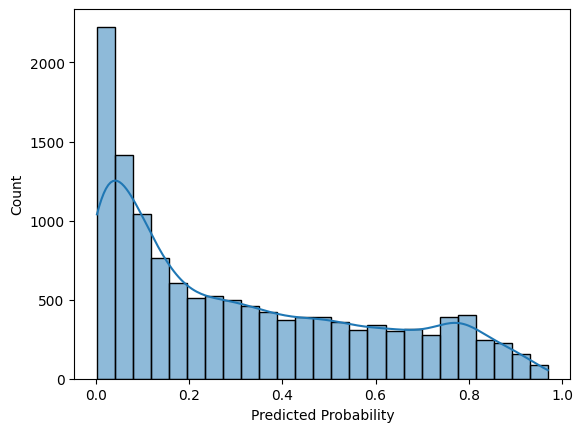

In [183]:
# Distribution plot of predicted probability
ax = sns.histplot(x = y_pred_test_weight,
             kde = True)

ax.set_xlabel('Predicted Probability')

### **3. RUS Training Set**
---

In [184]:
y_pred_test_rus, aic_test_rus, auc_rus = predict_test(X_test = X_test,
                                                      y_test = y_test,
                                                      model = best_rus_model,
                                                      predictors = best_predictors_rus)

y_pred_test_rus, aic_test_rus, auc_rus

(array([0.1308424 , 0.06999322, 0.26944146, ..., 0.19082982, 0.56107959,
        0.51172205]),
 29036.55,
 0.85)

In [185]:
# Summarize the RUS model performance
rus_eval = pd.Series({'Method': 'Undersampling',
                      'Predictors' : best_predictors_rus,
                      'AIC Valid': best_AIC_rus,
                      'AIC Test' : aic_test_rus,
                      'AUC' : auc_rus})

# Concatenate to model_eval summary
model_eval = pd.concat([model_eval, rus_eval],
                       axis=1,
                       ignore_index=True)
model_eval

,0,1,2
Method,Original,Class_weight,Undersampling
Predictors,"[0, 5, 1, 4]","[0, 5, 1, 4, 9, 10, 3, 6, 2, 8]","[0, 1, 5, 4]"
AIC Valid,4447.618246,29020.427697,27722.365386
AIC Test,4504.57,28852.52,29036.55
AUC,0.85,0.85,0.85


### **4. ROS Training Set**
---

In [186]:
y_pred_test_ros, aic_test_ros, auc_ros = predict_test(X_test = X_test,
                                                      y_test = y_test,
                                                      model = best_ros_model,
                                                      predictors = best_predictors_ros)
y_pred_test_ros, aic_test_ros, auc_ros

(array([0.13635973, 0.06822365, 0.28056121, ..., 0.1814583 , 0.56568874,
        0.50691004]),
 28785.63,
 0.85)

In [187]:
# Summarize the ROS model performance
ros_eval = pd.Series({'Method': 'Oversampling',
                      'Predictors' : best_predictors_ros,
                      'AIC Valid': best_AIC_ros,
                      'AIC Test' : aic_test_ros,
                      'AUC' : auc_ros})

# Concatenate to model_eval summary
model_eval = pd.concat([model_eval, ros_eval],
                       axis=1,
                       ignore_index=True)
model_eval.T

,Method,Predictors,AIC Valid,AIC Test,AUC
0,Original,"[0, 5, 1, 4]",4447.618246,4504.57,0.85
1,Class_weight,"[0, 5, 1, 4, 9, 10, 3, 6, 2, 8]",29020.427697,28852.52,0.85
2,Undersampling,"[0, 1, 5, 4]",27722.365386,29036.55,0.85
3,Oversampling,"[0, 5, 1, 4, 12, 8, 7, 3]",27409.917661,28785.63,0.85


**Summary:**
- The best model from the original training set yields the smallest AIC on the validation and testing set, but the model is difficult to predict `y=1` when the cut-off probability is 0.5.
- The AUC from all training sets is similar for this highly imbalanced data set.